# dataset information

This dataset includes data for tracking the number of people affected by COVID-19 worldwide, including:

confirmed tested cases of Coronavirus infection
the number of people who have reportedly died while sick with Coronavirus
the number of people who have reportedly recovered from it


Now find the number of deaths  as a target variable


# dataset attributes information

Date 

Country 

Confirmed 

Recovered 

Deaths

# import modules

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [4]:
df=pd.read_csv("covid_country.csv")
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [5]:
df.shape

(23688, 5)

this dataset has 23688 rows and 5 columns

In [7]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

# preprocessing the dataset

In [9]:
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [10]:
df["Date"].unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [13]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

this dataset has no missing values

# target variable

Recovered

# EDA

# total values of Confirmed, Recovered and Deaths  cases

In [25]:
df1=df.iloc[:,2:6]
df1

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
23683,429,365,3
23684,9,6,1
23685,249,10,49
23686,920,336,7


In [26]:
df1.sum()

Confirmed    188778378
Recovered     61157719
Deaths        12482037
dtype: int64

# relating the variable with bar plot

In [ ]:
sns.countplot(df["Subgroup"])
plt.title("Subgroup")
plt.show()

# relating the variables with scatterplots¶

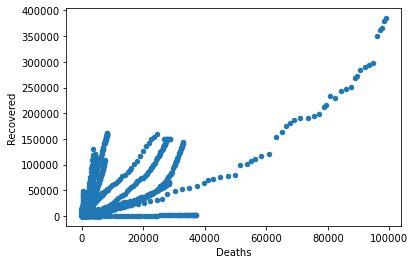

In [58]:
df.plot.scatter(x="Deaths", y="Recovered")

in the starting only deaths cases increased its means there was no cure in the starting, after that both recovered and deaths cases increased. 

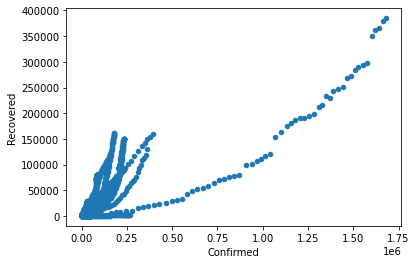

In [29]:
df.plot.scatter(x="Confirmed", y="Recovered")

In the starting there were only confirmed cases, there was no recovered cases. After some times recovered cases increased

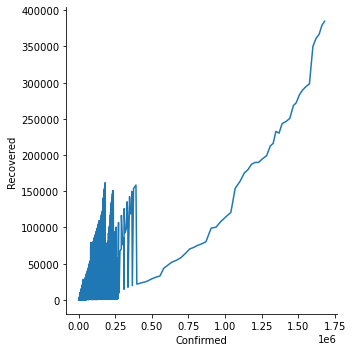

In [59]:
sns.relplot(x="Confirmed", y="Recovered",kind='line',data=df)

In the starting there were only confirmed cases, there was no recovered cases. After some times recovered cases increased

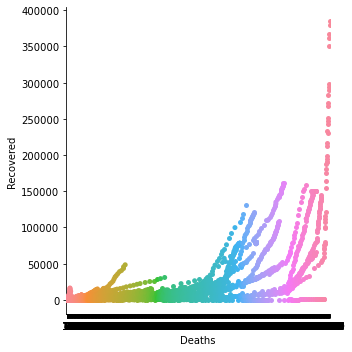

In [60]:
sns.catplot(x="Deaths", y="Recovered",data=df)

in the starting only deaths cases increased its means there was no cure in the starting, after that both recovered and deaths cases increased.

# country wise analysis

In [33]:
df2=df.iloc[:,1:6]
df2

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,0,0,0
1,Albania,0,0,0
2,Algeria,0,0,0
3,Andorra,0,0,0
4,Angola,0,0,0
...,...,...,...,...
23683,West Bank and Gaza,429,365,3
23684,Western Sahara,9,6,1
23685,Yemen,249,10,49
23686,Zambia,920,336,7


# cases in India

In [35]:
df2.loc[df2['Country']=='India'].sum()

Country      IndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaI...
Confirmed                                              2677040
Recovered                                               903541
Deaths                                                   83979
dtype: object

# cases in China

In [36]:
df2.loc[df2['Country']=='China'].sum()

Country      ChinaChinaChinaChinaChinaChinaChinaChinaChinaC...
Confirmed                                              8871610
Recovered                                              6776464
Deaths                                                  384657
dtype: object

# cases in Pakistan

In [37]:
df2.loc[df2['Country']=='Pakistan'].sum()

Country      PakistanPakistanPakistanPakistanPakistanPakist...
Confirmed                                              1187627
Recovered                                               315595
Deaths                                                   25001
dtype: object

# cases in Sri Lanka

In [38]:
df2.loc[df2['Country']=='Sri Lanka'].sum()

Country      Sri LankaSri LankaSri LankaSri LankaSri LankaS...
Confirmed                                                34748
Recovered                                                13344
Deaths                                                     428
dtype: object

# cases in Germany

In [39]:
df2.loc[df2['Country']=='Germany'].sum()

Country      GermanyGermanyGermanyGermanyGermanyGermanyGerm...
Confirmed                                              9046257
Recovered                                              6102898
Deaths                                                  319666
dtype: object

# correlation matrix

In [50]:
df2.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


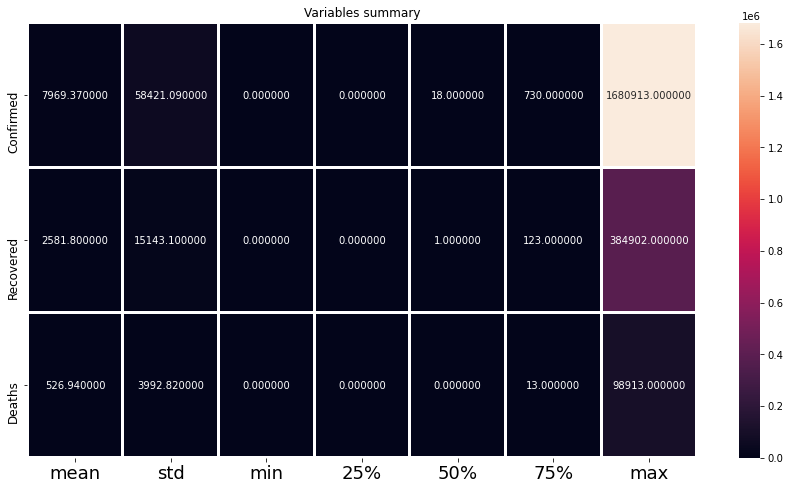

In [51]:
plt.figure(figsize=(15,8))
sns.heatmap(round(df2.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

there is so many difference between mean and std ,its mean there are outliers in the dataset

# check outliers

[Text(0, 0, 'Confirmed'), Text(0, 0, 'Recovered'), Text(0, 0, 'Deaths')]

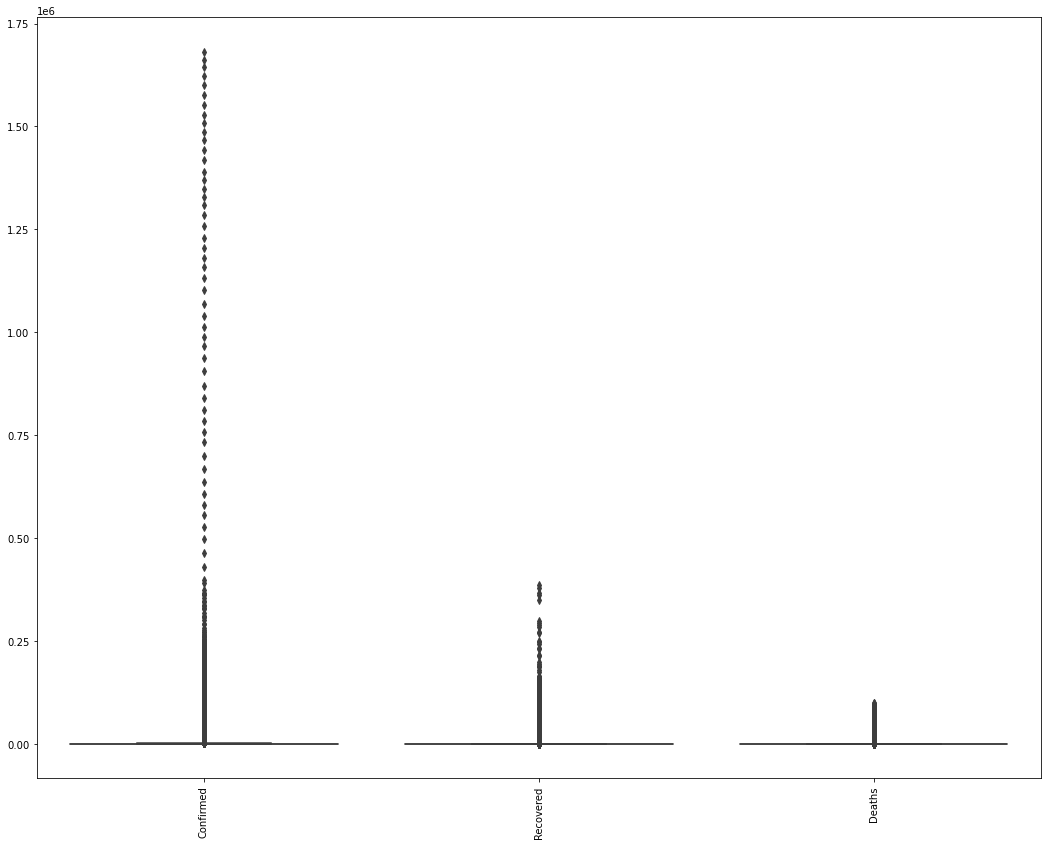

In [53]:
plt.figure(figsize=(18,14))
box = sns.boxplot(data=df2)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90)

in this dataset all attributes have outliers

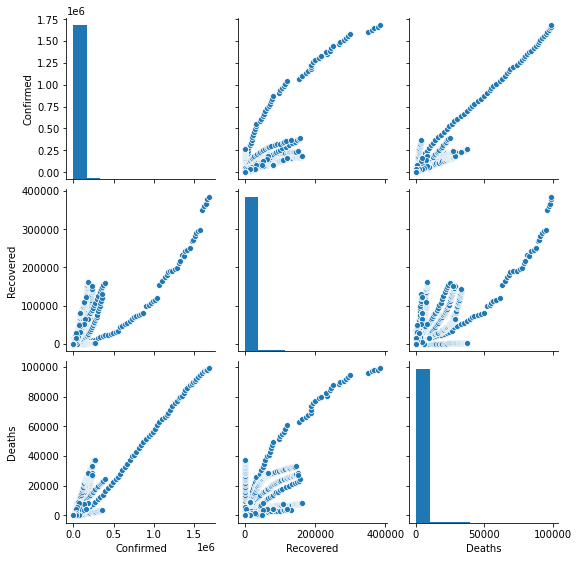

In [54]:
sns.pairplot(df2)